In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import *
from keras.callbacks import *

from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
def load_data(base_path, file_name):
    df = pd.read_csv(f"{base_path}/{file_name}")
    # df['label'] = df['label'].replace(classes)
    return df

base_path = "/content/drive/My Drive/skin-cancer-detection"

metadata = pd.read_csv(f"{base_path}/HAM10000_metadata.csv")

df = load_data(base_path, "hmnist_28_28_RGB.csv")
hmnist_28_28_L = load_data(base_path, "hmnist_28_28_L.csv")
hmnist_8_8_RGB = load_data(base_path, "hmnist_8_8_RGB.csv")
hmnist_8_8_L = load_data(base_path, "hmnist_8_8_L.csv")

In [47]:
label = df["label"]
data = df.drop(columns=["label"])
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


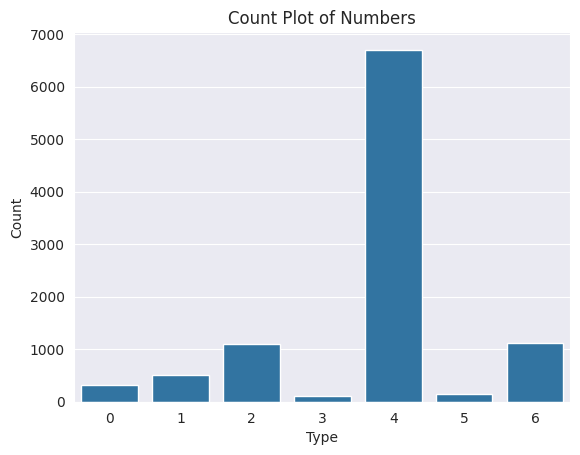

In [48]:
sns.countplot(x=df['label'])

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count Plot of Numbers')

plt.show()

In [49]:
len(data)

10015

In [50]:
oversample = RandomOverSampler()
data,label  = oversample.fit_resample(data,label)
data = np.array(data).reshape(-1,28,28,3)
label = np.array(label)
print(type(label))
data.shape

<class 'numpy.ndarray'>


(46935, 28, 28, 3)

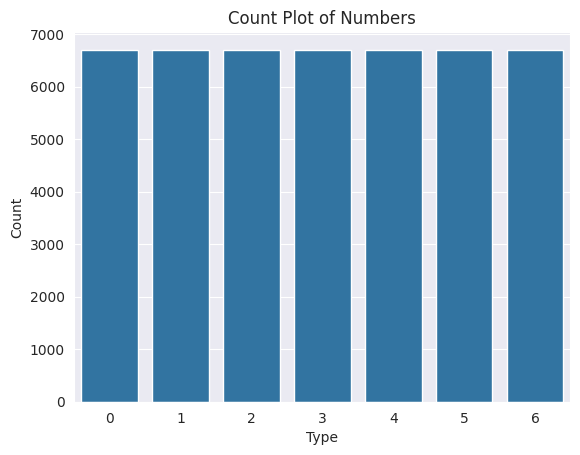

In [51]:
sns.countplot(x=label)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count Plot of Numbers')

plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [53]:
len(y_test)

9387

In [54]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [55]:
metadata['dx_type'].unique()

array(['histo', 'consensus', 'confocal', 'follow_up'], dtype=object)

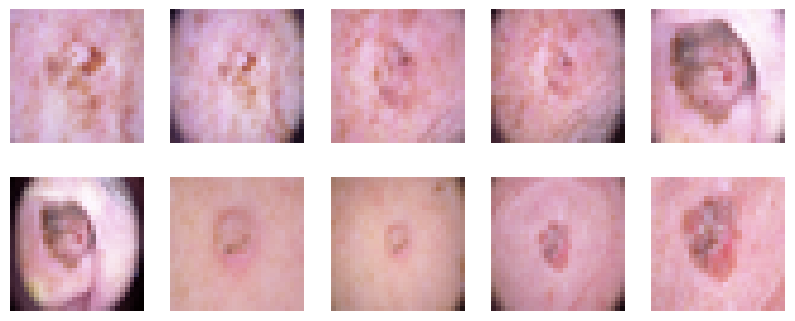

In [60]:
fig, axes = plt.subplots(2, 5, figsize=(10,4))

for i, ax in enumerate(axes.flatten()):
  reshaped_image = df.iloc[i, :-1].values.reshape((28, 28, 3))
  ax.imshow(reshaped_image.astype(np.uint8))
  ax.axis('off')

plt.show()

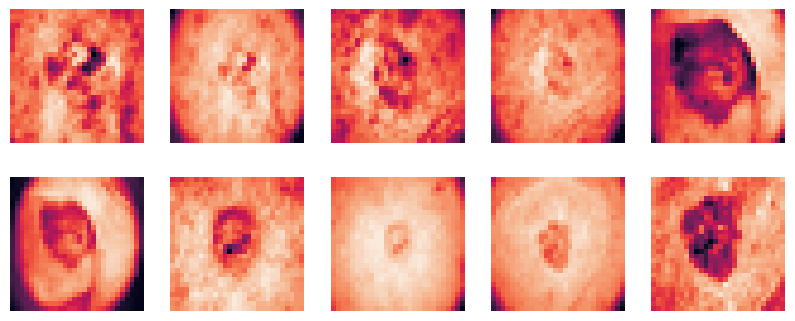

In [62]:
fig, axes = plt.subplots(2, 5, figsize=(10,4))

for i, ax in enumerate(axes.flatten()):
  reshaped_image = hmnist_28_28_L.iloc[i, :-1].values.reshape((28, 28))
  ax.imshow(reshaped_image.astype(np.uint8))
  ax.axis('off')

plt.show()

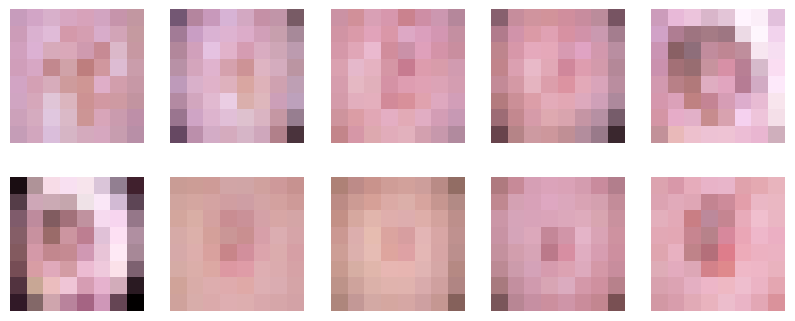

In [64]:
fig, axes = plt.subplots(2, 5, figsize=(10,4))

for i, ax in enumerate(axes.flatten()):
  reshaped_image = hmnist_8_8_RGB.iloc[i, :-1].values.reshape((8, 8, 3))
  ax.imshow(reshaped_image.astype(np.uint8))
  ax.axis('off')

plt.show()

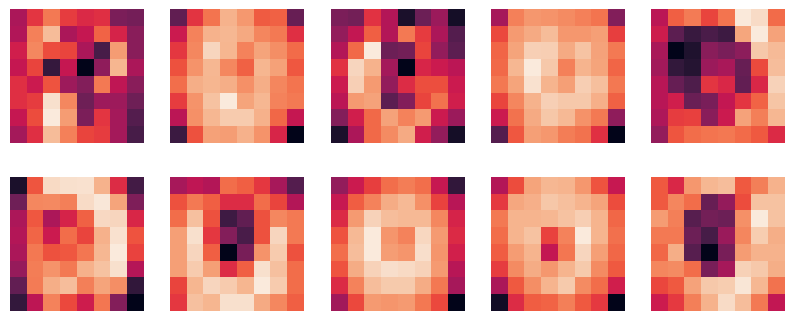

In [67]:
fig, axes = plt.subplots(2, 5, figsize=(10,4))

for i, ax in enumerate(axes.flatten()):
  reshaped_image = hmnist_8_8_L.iloc[i, :-1].values.reshape((8, 8))
  ax.imshow(reshaped_image.astype(np.uint8))
  ax.axis('off')

plt.show()

In [68]:
model = Sequential()

model.add(Rescaling(1./255, input_shape=(28, 28, 3) ))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3) , padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (5, 5), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (7, 7), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_2 (Activation)   (None, 28, 28, 64)        0

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 5, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train ,y_train ,epochs=20 ,batch_size=128,validation_data=(X_test , y_test) ,callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/20
294/294 [==============================] - 41s 116ms/step - loss: 1.5724 - accuracy: 0.3538 - val_loss: 1.0875 - val_accuracy: 0.5592 - lr: 0.0010
Epoch 2/20
294/294 [==============================] - 32s 110ms/step - loss: 0.7250 - accuracy: 0.7255 - val_loss: 0.4453 - val_accuracy: 0.8357 - lr: 0.0010
Epoch 3/20
294/294 [==============================] - 32s 108ms/step - loss: 0.3423 - accuracy: 0.8759 - val_loss: 0.2202 - val_accuracy: 0.9182 - lr: 0.0010
Epoch 4/20
294/294 [==============================] - 32s 110ms/step - loss: 0.2016 - accuracy: 0.9263 - val_loss: 0.1766 - val_accuracy: 0.9363 - lr: 0.0010
Epoch 5/20
294/294 [==============================] - 33s 112ms/step - loss: 0.1576 - accuracy: 0.9425 - val_loss: 0.1533 - val_accuracy: 0.9515 - lr: 0.0010
Epoch 6/20
294/294 [==============================] - 32s 110ms/step - loss: 0.1101 - accuracy: 0.9599 - val_loss: 0.1401 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 7/20
294/294 [==============================] 

In [71]:
from tensorflow.keras.models import load_model

# model.save('CNN_model2.h5')
model = load_model('/content/drive/My Drive/CNN_model2.h5')

In [72]:
model.evaluate(X_test , y_test)

y_pred = model.predict(X_test).round()

294/294 [==============================] - 2s 7ms/step


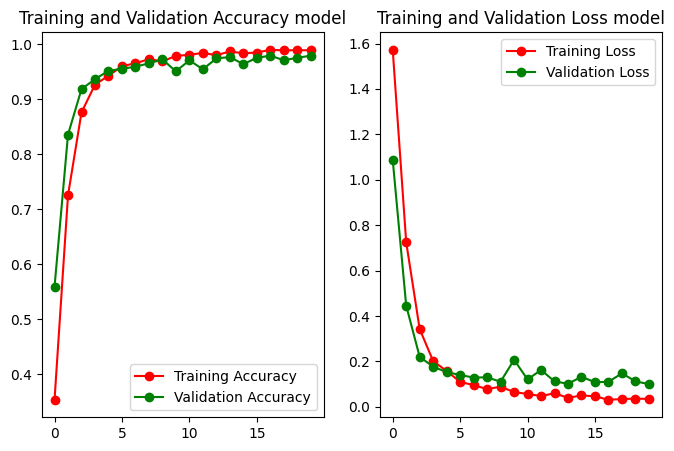

In [ ]:
def plot(history, model_name, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'ro-',label='Training Accuracy', )
    plt.plot(epochs_range, val_acc, 'go-', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'Training and Validation Accuracy {model_name}')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'ro-', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'go-', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'Training and Validation Loss {model_name}')
    plt.show()

plot(history, 'model', epochs = len(history.history['loss']))

In [73]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

target_names = [f"{classes[i]}" for i in range(7)]
print(classification_report(y_test , y_pred , target_names =target_names ))

                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       1.00      1.00      1.00      1295
                             ('bcc', ' basal cell carcinoma')       0.98      1.00      0.99      1323
                     ('bkl', 'benign keratosis-like lesions')       0.96      0.99      0.97      1351
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1392
                                  ('nv', ' melanocytic nevi')       0.99      0.86      0.92      1346
              ('vasc', ' pyogenic granulomas and hemorrhage')       1.00      1.00      1.00      1292
                                          ('mel', 'melanoma')       0.95      1.00      0.97      1388

                                                    micro avg       0.98      0.98      0.98      9387
                                                    macro avg       0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


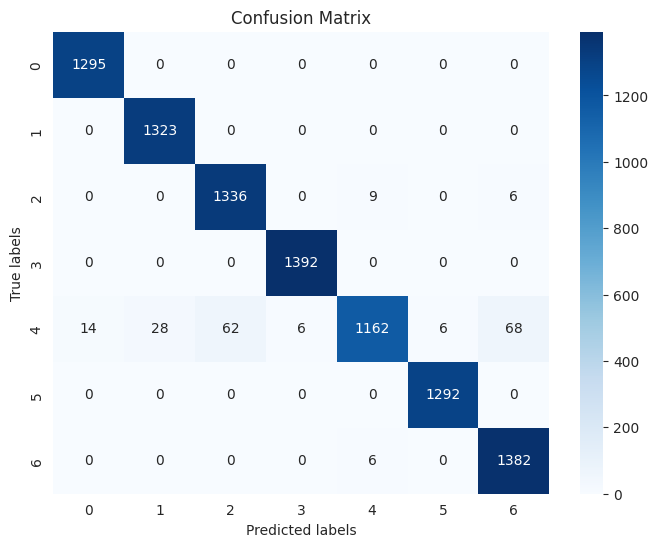

In [75]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()